In [ ]:
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
class JSONLoader:
    @staticmethod
    def save_json(company_name, data, label=""):
        filename = f'./demo/{company_name}_{label}.json' if label \
            else f'./demo/{company_name}.json'
        with open(filename, 'w') as outfile:
            json.dump(data, outfile)

    @staticmethod
    def load_json(filename):
        with open(filename, 'r') as infile:
            data, metadata = json.load(infile)
            return data, metadata

    pass

In [ ]:
ibm_data, ibm_metadata = JSONLoader.load_json("IBM_daily_adjusted.json")

In [ ]:
price_df = pd.DataFrame.from_dict(ibm_data, orient='index').astype('float')
price_df = price_df.reindex(index=price_df.index[::-1])
price_df.index = pd.to_datetime(price_df.index)
price_df = price_df.asfreq(freq="B")

In [ ]:
train_cutoff = 4500
training_set = price_df.iloc[:,4:5].values[:train_cutoff]

In [ ]:
# price_df
training_set
for i in np.where(np.isnan(training_set))[0]: 
  training_set[i] = training_set[i-1] if not np.isnan(training_set[i-1]) else 0 

In [ ]:
training_set.shape

(4500, 1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
# training_set_scaled[-30:]
training_set_scaled[0:30]

array([[0.20571078],
       [0.19592707],
       [0.19370808],
       [0.17953683],
       [0.1729303 ],
       [0.19214471],
       [0.19052884],
       [0.20759646],
       [0.19749728],
       [0.20189042],
       [0.19275066],
       [0.19557843],
       [0.19118528],
       [0.21264606],
       [0.24264065],
       [0.26248555],
       [0.25334579],
       [0.24546842],
       [0.24546842],
       [0.24799322],
       [0.24390305],
       [0.23819701],
       [0.24001486],
       [0.24935661],
       [0.28268393],
       [0.30353876],
       [0.3066695 ],
       [0.31505183],
       [0.29025832],
       [0.2681916 ]])

In [ ]:
X_train = []
y_train = []
n_steps_in = 60
for i in range(n_steps_in, train_cutoff):
    X_train.append(training_set_scaled[i-n_steps_in:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
X_train[0]

array([0.20571078, 0.19592707, 0.19370808, 0.17953683, 0.1729303 ,
       0.19214471, 0.19052884, 0.20759646, 0.19749728, 0.20189042,
       0.19275066, 0.19557843, 0.19118528, 0.21264606, 0.24264065,
       0.26248555, 0.25334579, 0.24546842, 0.24546842, 0.24799322,
       0.24390305, 0.23819701, 0.24001486, 0.24935661, 0.28268393,
       0.30353876, 0.3066695 , 0.31505183, 0.29025832, 0.2681916 ,
       0.27172631, 0.26945399, 0.25809241, 0.26915102, 0.27324119,
       0.26920151, 0.27384714, 0.263142  , 0.26627275, 0.26627275,
       0.27197879, 0.27228177, 0.2681916 , 0.2669292 , 0.26248555,
       0.30353876, 0.28364335, 0.30353876, 0.29343957, 0.29091477,
       0.31363794, 0.31868754, 0.32121234, 0.31490034, 0.32181829,
       0.32181829, 0.30227636, 0.32121234, 0.31868754, 0.33131152])

In [ ]:
n_features = 1
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], n_features))

In [ ]:
X_train

array([[[0.20571078],
        [0.19592707],
        [0.19370808],
        ...,
        [0.32121234],
        [0.31868754],
        [0.33131152]],

       [[0.19592707],
        [0.19370808],
        [0.17953683],
        ...,
        [0.31868754],
        [0.33131152],
        [0.33131152]],

       [[0.19370808],
        [0.17953683],
        [0.1729303 ],
        ...,
        [0.33131152],
        [0.33131152],
        [0.31929349]],

       ...,

       [[0.71492385],
        [0.71768001],
        [0.71807374],
        ...,
        [0.84708   ],
        [0.85025831],
        [0.88250494]],

       [[0.71768001],
        [0.71807374],
        [0.73966363],
        ...,
        [0.85025831],
        [0.88250494],
        [0.89833029]],

       [[0.71807374],
        [0.73966363],
        [0.74524157],
        ...,
        [0.88250494],
        [0.89833029],
        [0.90078024]]])

In [ ]:
y_train

array([0.33131152, 0.31929349, 0.30732595, ..., 0.89833029, 0.90078024,
       0.89177502])

In [ ]:
X_train.shape

(4440, 60, 1)

In [ ]:
y_train.shape

(4440,)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
139/139 [==============================] - 22s 113ms/step - loss: 0.0455
Epoch 2/100
139/139 [==============================] - 16s 114ms/step - loss: 0.0034
Epoch 3/100
139/139 [==============================] - 16s 114ms/step - loss: 0.0031
Epoch 4/100
139/139 [==============================] - 16s 114ms/step - loss: 0.0032
Epoch 5/100
139/139 [==============================] - 16s 115ms/step - loss: 0.0029
Epoch 6/100
139/139 [==============================] - 17s 123ms/step - loss: 0.0028
Epoch 7/100
139/139 [==============================] - 16s 114ms/step - loss: 0.0022
Epoch 8/100
139/139 [==============================] - 16s 115ms/step - loss: 0.0024
Epoch 9/100
139/139 [==============================] - 16s 116ms/step - loss: 0.0023
Epoch 10/100
139/139 [==============================] - 17s 120ms/step - loss: 0.0021
Epoch 11/100
139/139 [==============================] - 17s 119ms/step - loss: 0.0021
Epoch 12/100
139/139 [==============================] - 17s 121

In [ ]:
# test_df = pd.read_csv('sample_data/tatatest.csv')
test_set_size = 1000
test_set = price_df.iloc[:,4:5].values[train_cutoff:train_cutoff+test_set_size]
real_stock_price = test_set

In [ ]:
for i in np.where(np.isnan(test_set))[0]: 
  test_set[i] = test_set[i-1] if not np.isnan(test_set[i-1]) else 0 

In [ ]:
dataset_total = price_df['5. adjusted close'].values[:train_cutoff+test_set_size]
inputs = dataset_total[len(dataset_total)-len(test_set)-60:].reshape(-1,1)

inputs = sc.transform(inputs)
X_test = []
for i in range(n_steps_in, n_steps_in+120):
    X_test.append(inputs[i-n_steps_in:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
X_samp = []
train_end = training_set_scaled.shape[0]
for i in range(train_end-n_steps_in, train_end-0):
    X_samp.append(training_set_scaled[i-n_steps_in:i, 0])
X_samp = np.array(X_samp)

In [ ]:
X_samp.shape

(60, 60)

In [ ]:
X_samp = X_samp.reshape((X_samp.shape[0], X_samp.shape[1], 1))

In [ ]:
def get_prediction(model, train, n_steps=60, max_intervals=120): 
  predictions = []
  x_data = train[-n_steps:].reshape((1, n_steps, train.shape[1]))
  for i in range(max_intervals): 
    y_pred = model.predict(x_data)
    predictions.append(y_pred)
    x_data = np.hstack(( x_data[:,1:,:], y_pred.reshape((1, 1, 1)) ))
  predictions = np.array(predictions)
  predictions_c = np.concatenate(predictions)
  return predictions_c

In [ ]:
initial_data_o = price_df.iloc[:,4:5].values[:train_cutoff]
initial_data = sc.transform(initial_data_o)
test_data_o = price_df.iloc[:,4:5].values[train_cutoff:train_cutoff+120]
test_data = sc.transform(test_data_o)

In [ ]:
# predicted_stock_price = regressor.predict(X_test)
# predicted_stock_price = sc.inverse_transform(predicted_stock_price)
predicted_stock_price = get_prediction(regressor, initial_data)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
real_stock_price = np.copy(test_data)
real_stock_price = sc.inverse_transform(real_stock_price)

In [ ]:
predicted_last_2 = initial_data[-120:].reshape((120))
X_data = []
for i in range(60, 120):
    X_data.append(predicted_last_2[i-60:i])
X_data = np.array(X_data)
X_data = np.reshape(X_data, (X_data.shape[0], X_data.shape[1], 1))

predicted_stock_price_2 = regressor.predict(X_data)
predicted_stock_price_2 = sc.inverse_transform(predicted_stock_price_2)
predicted_stock_price_2 = predicted_stock_price_2.reshape(-1)

In [ ]:
predicted_stock_price_3 = regressor.predict(X_test)
predicted_stock_price_3 = sc.inverse_transform(predicted_stock_price_3)
predicted_stock_price_3 = predicted_stock_price_3.reshape(-1)

predicted_stock_price_4 = regressor.predict(X_samp)
predicted_stock_price_4 = sc.inverse_transform(predicted_stock_price_4)
predicted_stock_price_4 = predicted_stock_price_4.reshape(-1)

In [ ]:
predicted_stock_price_4

array([123.709076, 125.47817 , 126.6304  , 126.82296 , 129.64566 ,
       131.37627 , 130.4102  , 130.13417 , 130.42827 , 130.7874  ,
       131.19864 , 132.52138 , 133.04625 , 132.87393 , 132.79782 ,
       133.34644 , 134.23172 , 134.12106 , 133.39182 , 131.9332  ,
       131.46219 , 131.21576 , 131.33478 , 133.49945 , 134.7212  ,
       135.68315 , 135.63008 , 136.83797 , 137.54523 , 137.57536 ,
       137.00075 , 136.74228 , 137.08339 , 137.12398 , 136.98827 ,
       136.7769  , 136.68759 , 136.84259 , 136.47746 , 136.46938 ,
       136.21265 , 136.07552 , 136.5657  , 137.7026  , 137.9735  ,
       138.39238 , 137.80441 , 136.53745 , 137.0247  , 137.39075 ,
       137.21266 , 137.11595 , 137.34532 , 136.97144 , 136.77567 ,
       138.34438 , 139.31522 , 141.61143 , 143.72162 , 144.87154 ],
      dtype=float32)

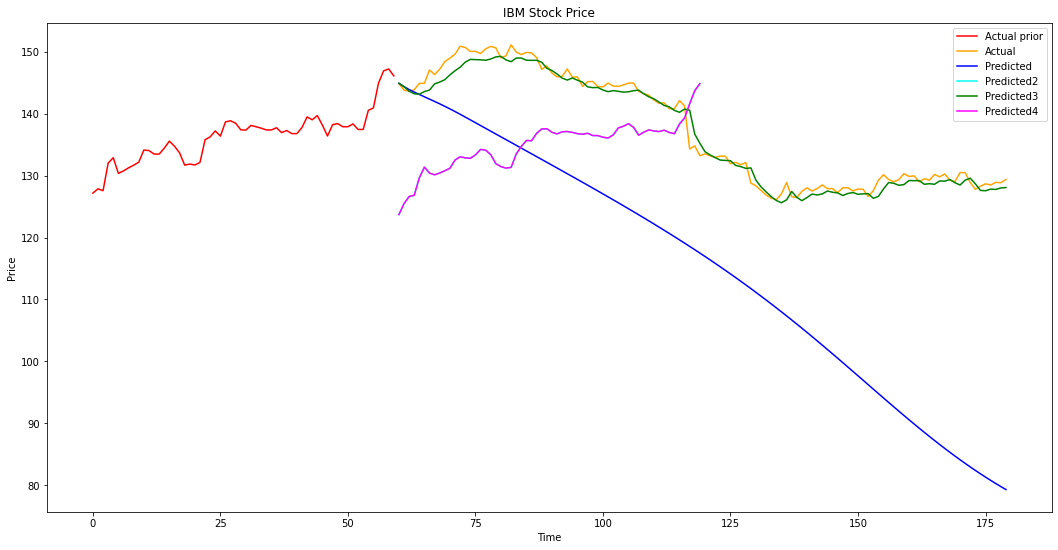

In [ ]:
plt.figure(figsize = (18,9))

pred_start = 60

plt.plot(range(pred_start), initial_data_o[-60:], color='red', label='Actual prior')
plt.plot(range(pred_start, pred_start+120), real_stock_price, color = 'orange', label = 'Actual')
plt.plot(range(pred_start, pred_start+120), predicted_stock_price, color = 'blue', label = 'Predicted')
plt.plot(range(pred_start, pred_start+60), predicted_stock_price_2, color = 'cyan', label = 'Predicted2')
plt.plot(range(pred_start, pred_start+120), predicted_stock_price_3, color = 'green', label = 'Predicted3')
plt.plot(range(pred_start, pred_start+60), predicted_stock_price_4, color = 'magenta', label = 'Predicted4')
plt.title('IBM Stock Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

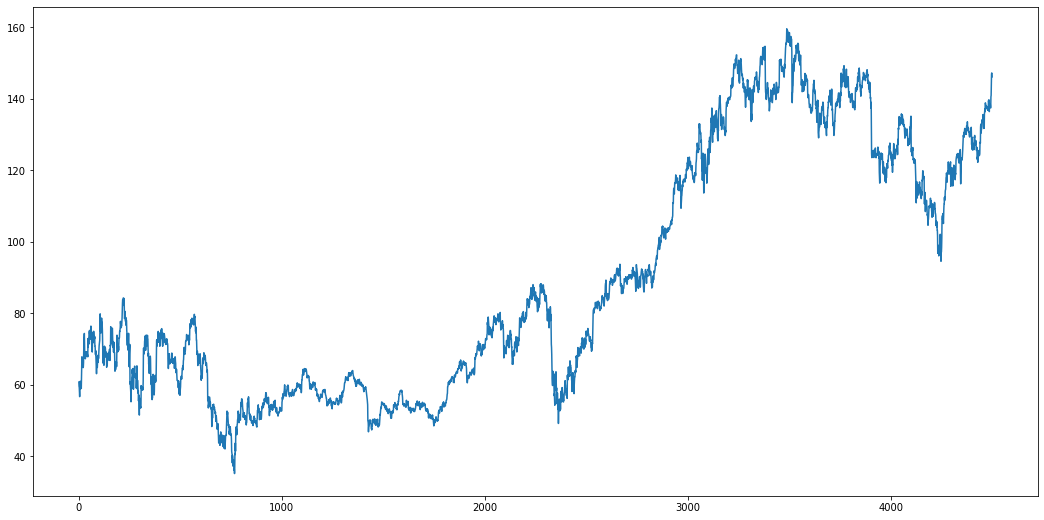

In [ ]:
plt.figure(figsize=(18,9))

plt.plot(initial_data_o)